In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, r2_score,mean_squared_error

Классификация

In [3]:
RANDOM_SEED=0

Text(0, 0.5, 'X2')

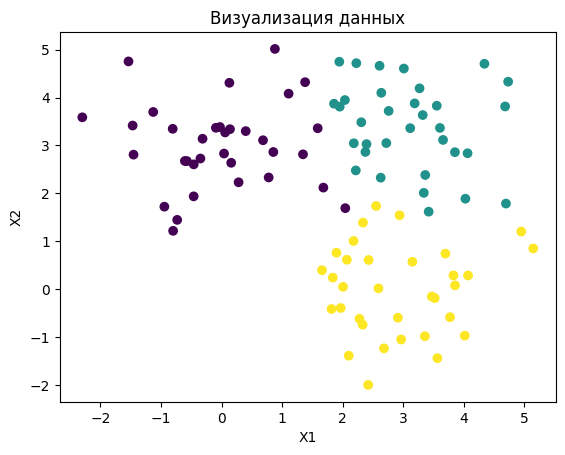

In [4]:
X, y = make_blobs(n_samples=100, centers=[(0,3),(3,3),(3,0)],
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(0.9,0.9,0.9))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

Здесь мы задаем вид функции, которая будет использоваться для нахождения оптимальной границы разбиения выборки. По умолчанию используется критерий Джини, а мы сейчас будем использовать критерий информационной энтропии. Также мы задает максимальную глубину дерева. Дерево не будет "расти" дальше этого количества уровней.

In [18]:
depth=5
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth,
                                  random_state=RANDOM_SEED)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

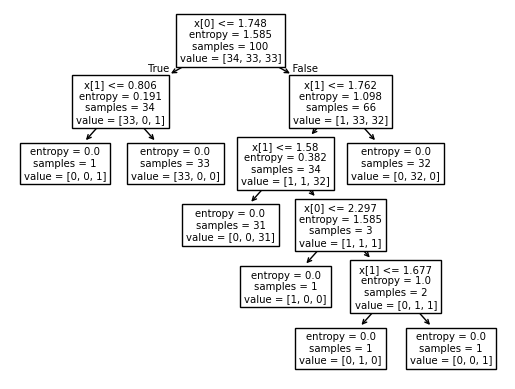

In [19]:
plot_tree(clf_tree)
plt.show()

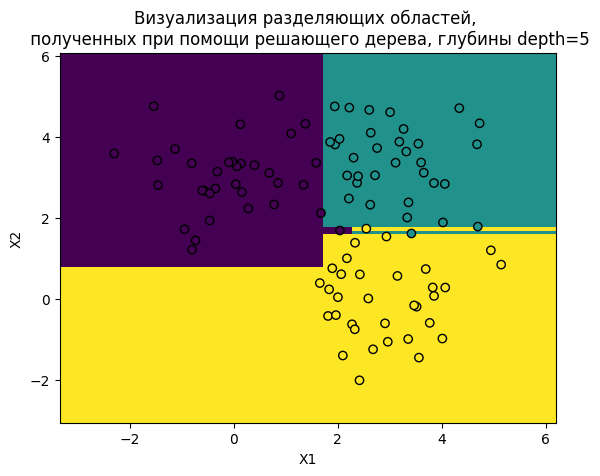

In [20]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [21]:
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

[[34  0  0]
 [ 0 33  0]
 [ 0  0 33]]
Accuracy = 1.0
F1_score = 1.0


In [22]:
observation_new = [[2, 1]]

In [23]:
clf_tree.predict(observation_new)

array([2])

**Задача регрессии**

In [48]:
n_samples = 100
X = np.sort(np.random.rand(n_samples)).reshape((-1,1))
y = np.exp(X[:,0] ** 2)+np.random.normal(0.0, 0.1, X[:,0].shape[0])

In [49]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

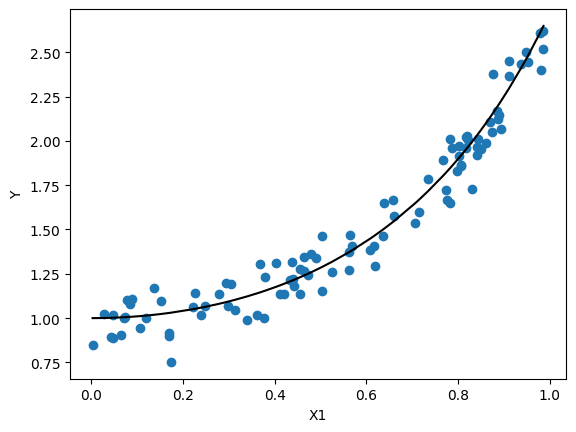

In [50]:
plt.scatter(X[:,0],y)
plt.plot(X[:,0],np.exp(X[:,0]**2),c='k')

plt.xlabel('X1')
plt.ylabel('Y')
plt.show()

In [51]:
depth=3
reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=RANDOM_SEED)
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [52]:
y_pred_reg=reg_tree.predict(X)

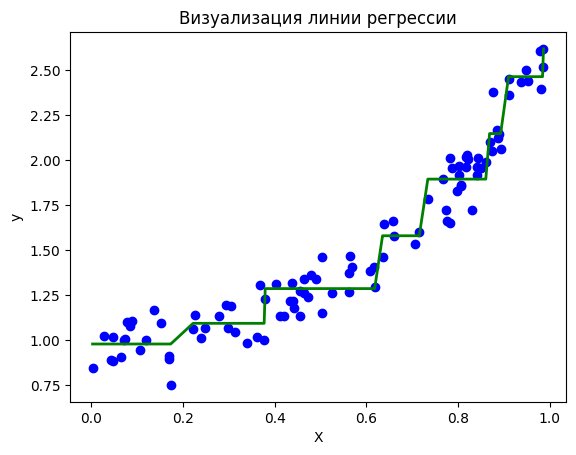

In [53]:
plt.scatter(X, y, c="b")

plt.plot(X, y_pred_reg, "g", lw=2)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y');

In [56]:
print('r2= ', r2_score(y, y_pred_reg))
print('MSE= ', mean_squared_error(y, y_pred_reg))

r2=  0.959622238562049
MSE=  0.009745380774938691


In [57]:
observation_new = [[0.7]]

In [58]:
y_new_pred = reg_tree.predict(observation_new)

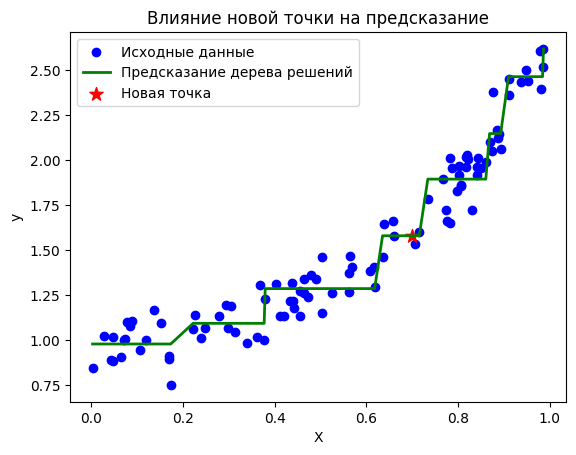

In [60]:
plt.scatter(X, y, c="b", label="Исходные данные")


plt.plot(X, y_pred_reg, "g", lw=2, label="Предсказание дерева решений")


plt.scatter(observation_new, y_new_pred, c="r", s=100, marker="*", label="Новая точка")

plt.title('Влияние новой точки на предсказание')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [65]:
r2 = r2_score(y, y_pred_reg)
r2

0.959622238562049

In [67]:
mse = mean_squared_error(y, y_pred_reg)
mse

0.009745380774938691